## 주제: 데이터 분석으로 심부전증 예방하기

### 데이터 소개

- anaemia: 빈혈증 여부
- creatinine_phosphokinase: 크레아틴키나제 검사 결과
- diabetes: 당뇨병 여부
- ejection_fraction: 박출계수(%)(심장의 펌프 기능)
- platelets: 혈소판 수
- serum_creatinine: 혈중 크레아틴 레벨
- serum_sodium: 혈중 나트륨 레벨
- time: 관찰 기간
- DEATH_EVENT: 사망 여부

### 최종 목표
- 의료 데이터와 그 분석에 대한 이해
- 데이터 시각화를 통한 인사이트 습득
- 사이킷런 기반의 모델 학습 방법 습득
- 분류 모델의 학습과 평가방법 이해

### step 1. 데이터 셋 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import os

In [3]:
# Linux 명령어로 Kaggle API 이용하여 데이터 셋 다운로드하기(!Kaggle ~ )
# Linux 명령어로 압축 해제 하기
# !kaggle datasets download -d and rewmvd/heart-failure-clinical-data
# !unzip '*.zip'

In [4]:
df = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### step 2. EDA 및 데이터 기초 통계 분석
#### 2.1. 각 컬럼 분석하기

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### 2.2. 수치형 데이터의 히스토그램 그리기

<Axes: xlabel='age', ylabel='Count'>

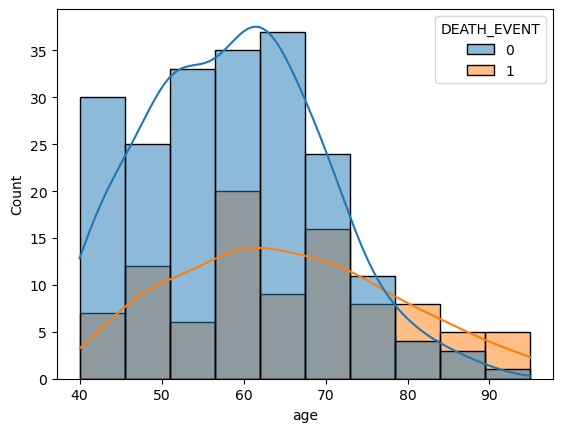

In [7]:
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

<Axes: xlabel='creatinine_phosphokinase', ylabel='Count'>

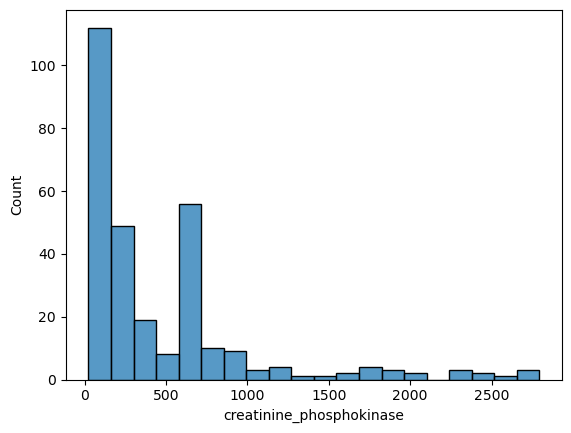

In [8]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

<Axes: xlabel='ejection_fraction', ylabel='Count'>

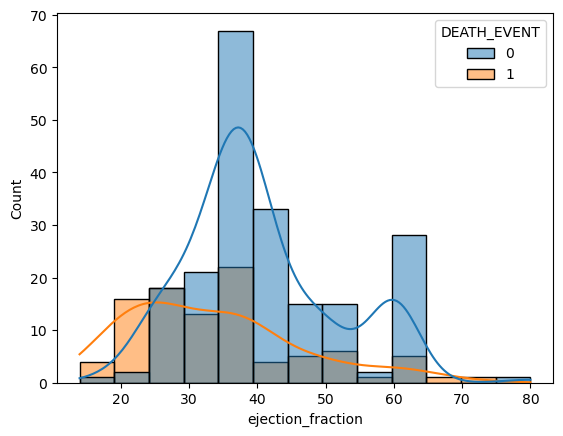

In [9]:
sns.histplot(x='ejection_fraction', data=df, hue='DEATH_EVENT', kde=True, bins=13)

<Axes: xlabel='platelets', ylabel='Count'>

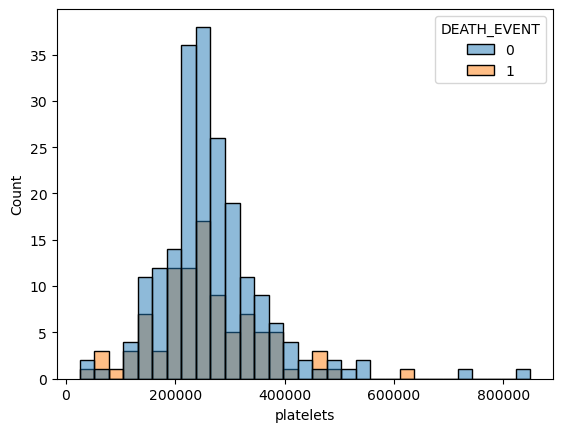

In [10]:
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT')

<Axes: xlabel='time', ylabel='Count'>

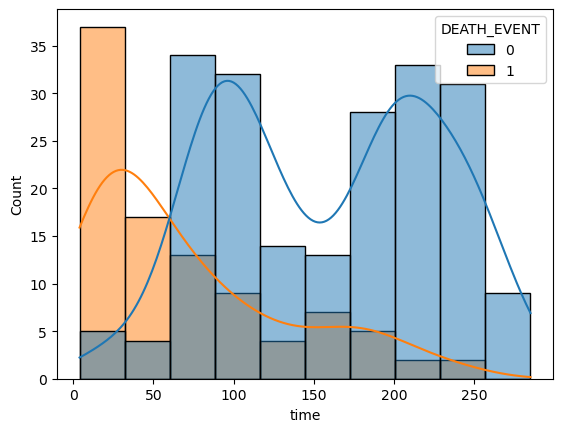

In [11]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

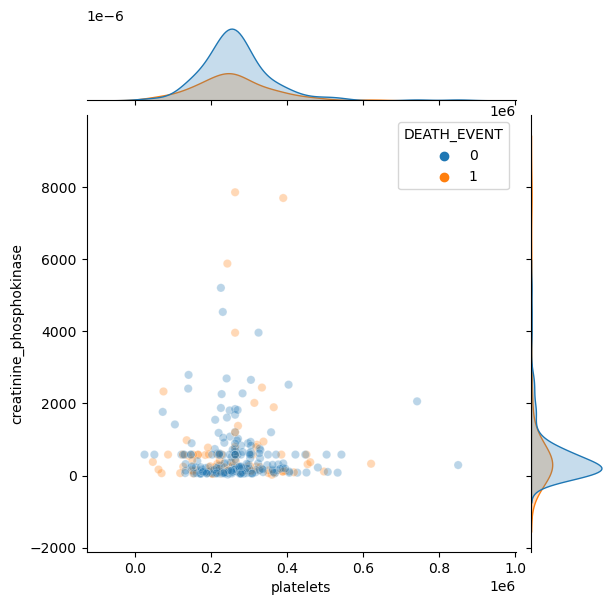

In [12]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)

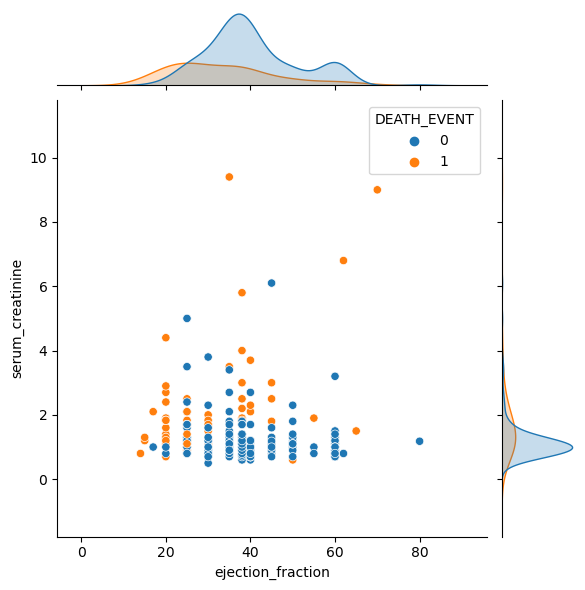

In [13]:
sns.jointplot(x='ejection_fraction', y='serum_creatinine', hue='DEATH_EVENT', data=df)

#### 2.3. boxplot 계열을 이용하여 범주별 통계 확인

<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

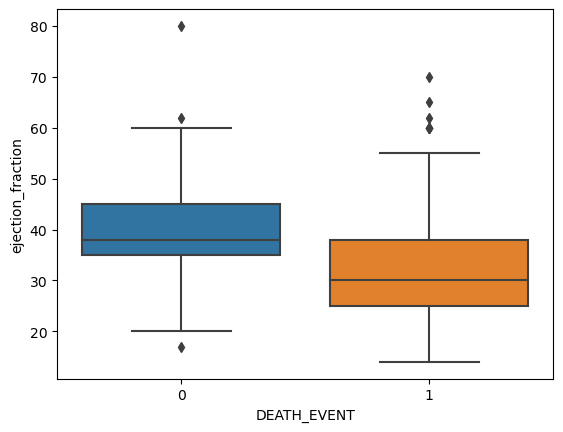

In [14]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

<Axes: xlabel='smoking', ylabel='ejection_fraction'>

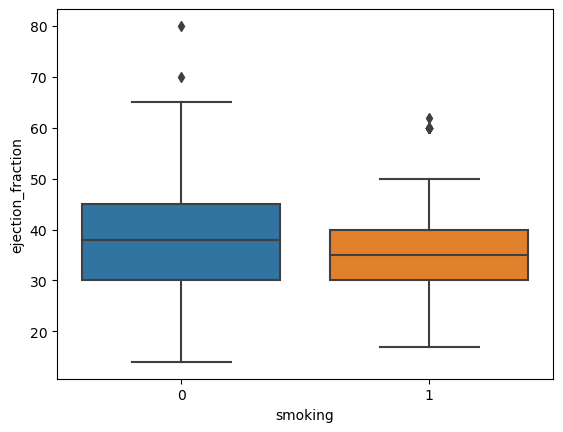

In [15]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df)

<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

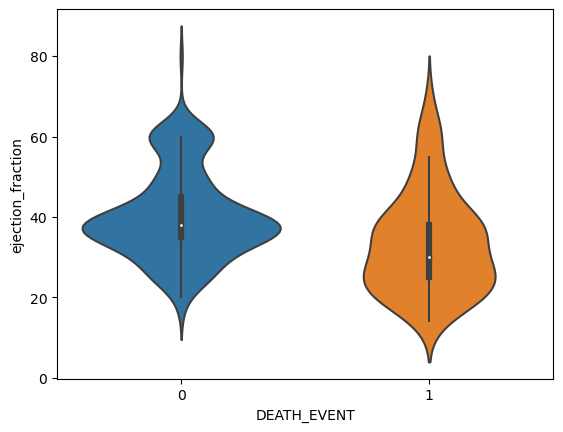

In [16]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

<Axes: xlabel='DEATH_EVENT', ylabel='platelets'>

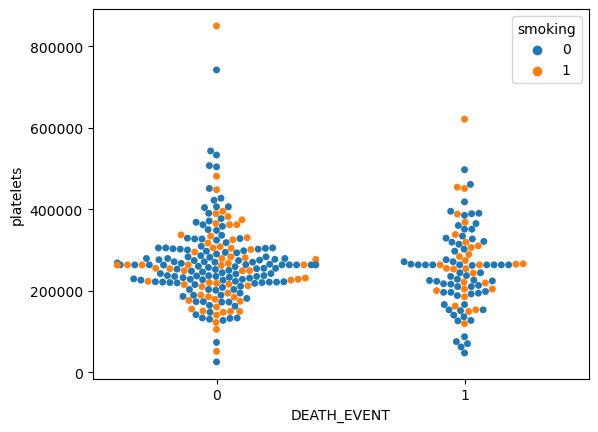

In [17]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)

### step 3. 모델 학습을 위한 데이터 전처리
#### 3.1. StandardScaler를 이용하여 데이터 전처리하기

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [20]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [21]:
# 수치형 입력 데이터 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)

StandardScaler()

In [22]:
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


#### 3.2. 학습 데이터와 테스트 데이터 분리

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Step 4. Classification 모델 학습하기
#### 4.1. Logistic Regression 모델 생성/학습하기

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### 4.2. 모델 학습 결과 평가하기

In [27]:
from sklearn.metrics import classification_report

In [28]:
# Predict 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



#### 4.3.XGBoost 모델 생성/학습하기

In [29]:
!pip install xgboost

In [30]:
import xgboost

In [31]:
from xgboost import XGBClassifier

In [32]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### 4.4. 모델 학습 결과 평가하기

In [33]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
           1       0.62      0.50      0.55        26

    accuracy                           0.77        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.76      0.77      0.76        90



#### 4.5. 특징의 중요도 확인하기

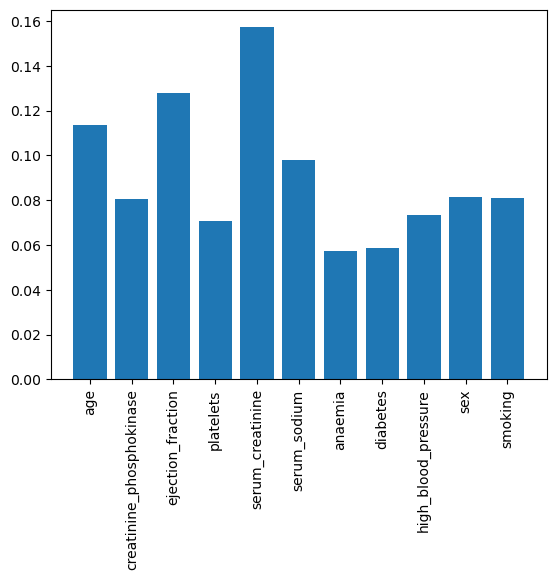

In [34]:
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

### step 5. 모델 학습 결과 심화 분석하기
#### 5.1. Precision-Recall 커브 확인하기

In [48]:
# from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

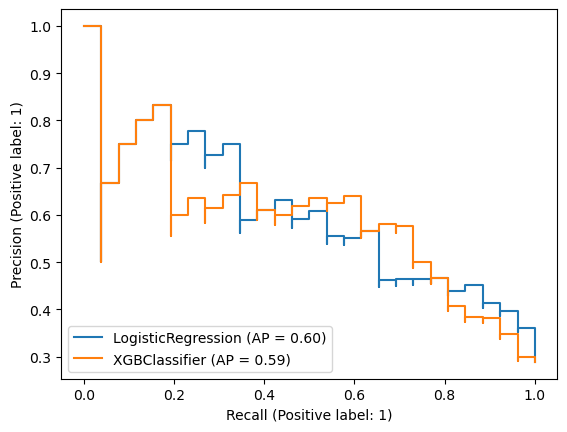

In [52]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
PrecisionRecallDisplay.from_estimator(model_lr, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(model_xgb, X_test, y_test, ax=ax)

#### 5.2. ROC 커브 확인하기

In [37]:
from sklearn.metrics import RocCurveDisplay

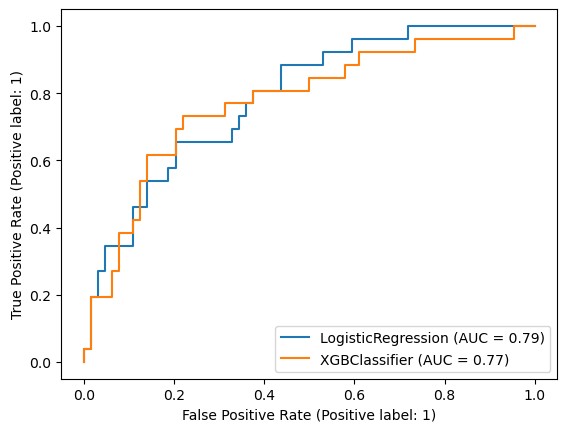

In [54]:
fig = plt.figure()
ax = fig.gca()
RocCurveDisplay.from_estimator(model_lr, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(model_xgb, X_test, y_test, ax=ax)